# 2019 General election data analysis

# In this dataset 2019 general election data is given.Top 3 party and Nota data is given for each constituency.

In [1]:
##importing all library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# importing the dataset

In [3]:
df=pd.read_csv(r'E:\Desktop\exceldataviz\archive (9)\LS_2.0.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df.shape

(2263, 19)

In [5]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [6]:
df.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                               object
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [7]:
## checking null value

In [8]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [9]:
## Data cleaning

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\n','_') 
df.rename(columns = {'over total electors _in constituency':'total_voters',
                    'over total votes polled _in constituency':'votes_polled',
                    'total electors':'total_electors'},inplace=True)

In [11]:
print('Major parties that contested elections in 2019 General Elections =',df['party'].nunique())

Major parties that contested elections in 2019 General Elections = 133


In [12]:
def change_value(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['assets'] = df['assets'].apply((change_value))
df['liabilities'] = df['liabilities'].apply((change_value))
df.head()

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [13]:
df['education']=df['education'].str.replace('\n','')
df['party']=df['party'].str.replace('TRS','BRS')

In [14]:
df1=df[df['party']!='NOTA']
df1.isnull().sum()

state             0
constituency      0
name              0
winner            0
party             0
symbol            0
gender            0
criminal_cases    0
age               0
category          0
education         0
assets            0
liabilities       0
general_votes     0
postal_votes      0
total_votes       0
total_voters      0
votes_polled      0
total_electors    0
dtype: int64

In [15]:
df=df.fillna(0)
df['criminal_cases']=df['criminal_cases'].replace({'Not Available':0})
df['criminal_cases'] = pd.to_numeric(df['criminal_cases'],errors='coerce').astype(np.int64)
df['age']=df['age'].apply(lambda x:round(x))

def numer(i):
    df[i]=pd.to_numeric(df[i])

numer('assets')
numer('liabilities')
numer('age')

In [16]:
df.dtypes

state              object
constituency       object
name               object
winner              int64
party              object
symbol             object
gender             object
criminal_cases      int64
age                 int64
category           object
education          object
assets              int64
liabilities         int64
general_votes       int64
postal_votes        int64
total_votes         int64
total_voters      float64
votes_polled      float64
total_electors      int64
dtype: object

In [17]:
df.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,BRS,Car,MALE,0,54,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790


In [18]:
df['gender'].value_counts()

MALE      1760
FEMALE     258
0          245
Name: gender, dtype: int64

In [19]:
winners=df1[df1['winner']==1]
winners['gender'].value_counts()

MALE      463
FEMALE     76
Name: gender, dtype: int64

# winning candidate gender ratio

Text(0.5, 1.0, 'winning candidates gender ratio')

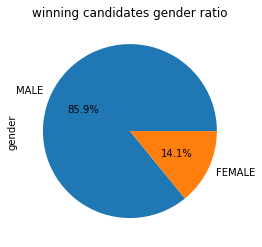

In [20]:
x=winners['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
x.set_title("winning candidates gender ratio")

# overall participate candidate gender ratio

Text(0.5, 1.0, 'candidates gender ratio')

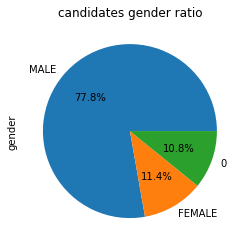

In [21]:
x=df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
x.set_title("candidates gender ratio")

# Top 10 party interms of no of state faught

In [22]:
party_state=df1.groupby('party')['state'].nunique() \
.reset_index(name='no_of_state')

party_state.sort_values(by='no_of_state',ascending=False)[:10]

,party,no_of_state
47,INC,35
26,BJP,33
48,IND,24
36,BSP,20
39,CPI(M),19
19,APoI,6
1,AAP,6
82,NPEP,5
30,BMUP,4
109,SHS,4


# Top 10 party interms of no of constituency faught

In [23]:
party_state=df1.groupby('party')['constituency'].nunique() \
.reset_index(name='no_of_constituency')

party_state.sort_values(by='no_of_constituency',ascending=False)[:10]

,party,no_of_constituency
26,BJP,418
47,INC,412
36,BSP,163
48,IND,137
39,CPI(M),100
122,VBA,47
13,AITC,47
112,SP,39
84,NTK,38
75,MNM,36


# statewise winning seat for each party

In [24]:
st_party=winners.groupby(['party','state'])['winner'].sum()\
.reset_index(name='wins')

win_party=st_party.sort_values(by='wins',ascending=False)
win_party

,party,state,wins
31,BJP,Uttar Pradesh,60
22,BJP,Madhya Pradesh,28
16,BJP,Gujarat,26
21,BJP,Karnataka,25
28,BJP,Rajasthan,24
...,...,...,...
50,INC,Meghalaya,1
51,INC,Odisha,1
52,INC,Puducherry,1
56,INC,Uttar Pradesh,1


# bjp total seat count statewise

In [25]:
bjp_won=win_party[win_party['party']=='BJP']
bjp_won


,party,state,wins
31,BJP,Uttar Pradesh,60
22,BJP,Madhya Pradesh,28
16,BJP,Gujarat,26
21,BJP,Karnataka,25
28,BJP,Rajasthan,24
23,BJP,Maharashtra,22
33,BJP,West Bengal,18
11,BJP,Bihar,17
20,BJP,Jharkhand,11
17,BJP,Haryana,10


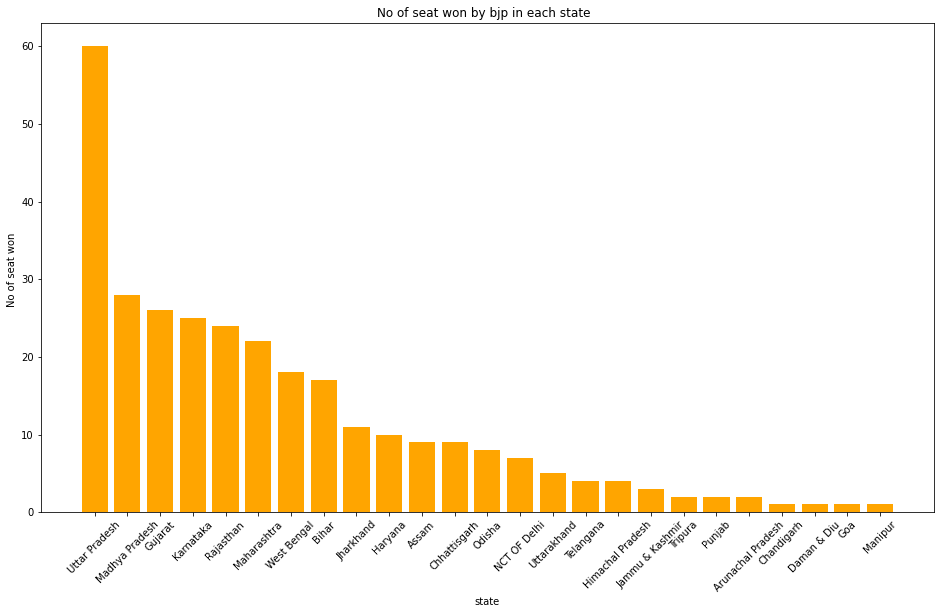

In [26]:
plt.figure(figsize=(16,9))
plt.bar(bjp_won['state'],bjp_won['wins'],color='#FFA500')       
plt.xlabel("state")
plt.ylabel("No of seat won ")
plt.title("No of seat won by bjp in each state  ")
plt.xticks(rotation = 45)
plt.show()

In [27]:
INC_won=win_party[win_party['party']=='INC']
INC_won

,party,state,wins
47,INC,Kerala,15
53,INC,Punjab,8
54,INC,Tamil Nadu,8
55,INC,Telangana,3
41,INC,Assam,3
43,INC,Chhattisgarh,2
57,INC,West Bengal,2
40,INC,Andaman & Nicobar Islands,1
44,INC,Goa,1
45,INC,Jharkhand,1


# INC statewise seatcount

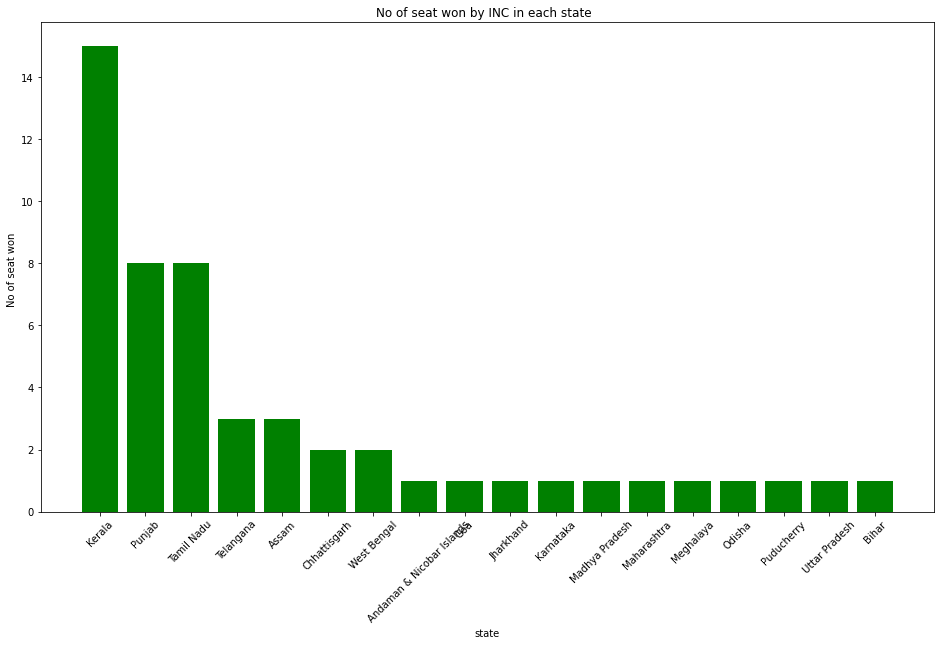

In [28]:
plt.figure(figsize=(16,9))
plt.bar(INC_won['state'],INC_won['wins'],color='g')       
plt.xlabel("state")
plt.ylabel("No of seat won ")
plt.title("No of seat won by INC in each state  ")
plt.xticks(rotation = 45)
plt.show()

In [29]:
partywise_seat=winners['party'].value_counts()[:10]


# Top 10 party based on winning seat

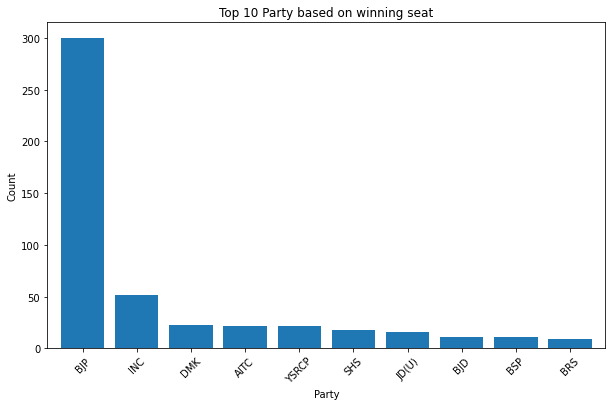

In [30]:
plt.figure(figsize=(10, 6))  
partywise_seat.plot(kind='bar',width=0.80)
plt.title('Top 10 Party based on winning seat')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

# No of seat own by male candidate in each party

In [31]:
gn_party=winners.groupby(['party','gender'])['winner'].sum()\
.reset_index(name='wins')
gender_party=gn_party.sort_values(by='wins',ascending=False)
gender_party[gender_party['gender']=='MALE']

,party,gender,wins
12,BJP,MALE,260
21,INC,MALE,46
19,DMK,MALE,21
50,YSRCP,MALE,18
44,SHS,MALE,17
27,JD(U),MALE,15
6,AITC,MALE,13
16,BSP,MALE,10
14,BRS,MALE,8
10,BJD,MALE,7


# No of seat own by male candidate in each party

In [32]:
gender_party[gender_party['gender']=='FEMALE']

,party,gender,wins
11,BJP,FEMALE,40
5,AITC,FEMALE,9
20,INC,FEMALE,6
9,BJD,FEMALE,4
49,YSRCP,FEMALE,4
18,DMK,FEMALE,2
22,IND,FEMALE,2
37,NPEP,FEMALE,1
41,SAD,FEMALE,1
43,SHS,FEMALE,1


In [33]:
vote_share_top5=df1.groupby('party')['total_votes'].sum().nlargest(5).index.tolist()
vote_share_top5

['BJP', 'INC', 'AITC', 'BSP', 'SP']

# Top 5 party by Total_vote

In [34]:
vote_share=df1.groupby('party')['total_votes'].sum()\
.reset_index(name='vote')
top5_voteshare=vote_share.sort_values(by='vote',ascending=False)[:5]
top5_voteshare


,party,vote
26,BJP,228938556
47,INC,119418722
13,AITC,24832104
36,BSP,20808194
112,SP,15616282


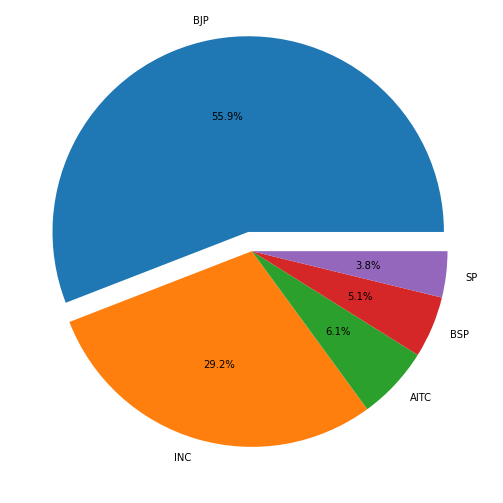

In [35]:
plt.figure(figsize=(16,9))
plt.pie(x=top5_voteshare['vote'],labels=top5_voteshare['party'],autopct="%1.1f%%",explode=[0.1,0,0,0,0])
plt.show()

In [36]:
criminalcase=df1[df1['criminal_cases']!=0]
nocriminalcase=df1[df1['criminal_cases']==0]

cri=criminalcase.groupby('party')['name']\
.count().reset_index(name='candidates')

no_cri=nocriminalcase.groupby('party')['name']\
.count().reset_index(name='candidates')

# Top 10 party interms of candiade having criminal case

In [37]:
cri.sort_values(by="candidates",ascending=False)[:10]

,party,candidates
26,BJP,420
47,INC,413
48,IND,201
36,BSP,163
39,CPI(M),100
122,VBA,47
13,AITC,47
112,SP,39
84,NTK,38
75,MNM,36


In [38]:
cri.sort_values(by="candidates",ascending=True)[:10]

,party,candidates
131,ravp,1
69,KEC(M),1
110,SJDD,1
35,BSCP,1
107,SDF,1
105,SAD(M),1
38,BVA,1
102,RTORP,1
41,CPIM,1
99,RSOSP,1


# Top 10 candidate interms of criminal case

In [39]:
#criminalcase['criminal_cases'].replace('Not Available',0,inplace=True)
df[['party','name','criminal_cases']].sort_values(by='criminal_cases',ascending=False)[:10]

,party,name,criminal_cases
1652,BJP,K SURENDRAN,240
903,INC,Adv. DEAN KURIAKOSE,204
0,BJP,SOYAM BAPU RAO,52
1361,INC,ANUMULA REVANTH REDDY,42
2022,INC,George Tirkey,41
169,BJP,SOBHASURENDRAN,40
1305,JAPL,Rajesh Ranjan @ Pappu Yadav,31
458,BSP,YOGESH VERMA,28
321,BJP,ARJUN SINGH,24
1235,BJP,Adv.PRAKASH BABU,22


# average age of candidate is 52

# average age of male is 53 and female is 47

# minimum age of male and female candidate is 25

# Higest age of female candidate is 81 and male is 86

In [40]:
df1['age'].mean()

52.27353815659068

In [41]:
round(df1.groupby(by="gender")['age'].mean())

gender
FEMALE    47.0
MALE      53.0
Name: age, dtype: float64

In [42]:
round(df1.groupby(by="gender")['age'].min())

gender
FEMALE    25.0
MALE      25.0
Name: age, dtype: float64

In [43]:
round(df1.groupby(by="gender")['age'].max())

gender
FEMALE    81.0
MALE      86.0
Name: age, dtype: float64

In [44]:
df_male=df1[df1['gender']=='MALE']
df_male.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,BRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790


In [45]:
df_female=df1[df1['gender']=='FEMALE']
df_female.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,55075753,0,44877,272,45149,2.330042,3.940979,1937690
11,Gujarat,AHMEDABAD EAST,Gitaben Patel,0,INC,Hand,FEMALE,6,38.0,GENERAL,10th Pass,40375418,3121888,312883,2621,315504,17.413352,28.193562,1811851


# age distribution of male candidate

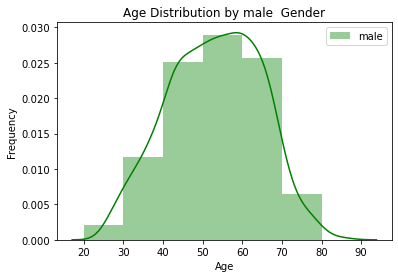

In [46]:
age_bins = [20, 30, 40, 50, 60, 70, 80]
sns.distplot(df_male['age'], bins=age_bins, label="male",color='g')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.title("Age Distribution by male  Gender")
plt.show()


# age distribution of female candidate

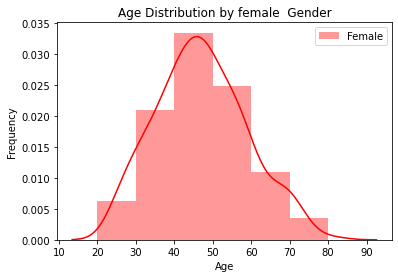

In [47]:
age_bins = [20, 30, 40, 50, 60, 70, 80]

sns.distplot(df_female['age'], bins=age_bins, label="Female",color='r')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.title("Age Distribution by female  Gender")
plt.show()

# Top 10 party interms of highest average age

In [48]:
party_avg_age=df1.groupby('party')['age'].mean().round() \
.reset_index(name='avg_age')
party_avg_age.sort_values(by='avg_age',ascending=False)[:10]

,party,avg_age
105,SAD(M),74.0
59,JKN,73.0
125,VPI,70.0
32,BOPF,69.0
68,KEC,68.0
78,NAWPP,68.0
131,ravp,68.0
69,KEC(M),66.0
110,SJDD,65.0
9,AIFB,65.0


In [49]:
Top_party=df1.groupby(by="party")['total_votes'].sum() \
.reset_index(name='vote')
top5=Top_party.sort_values(by='vote',ascending=False)[:5]
x=df1.merge(top5,on='party')
x.groupby(by='party')['age'].mean()


party
AITC    54.042553
BJP     54.583333
BSP     48.588957
INC     55.031477
SP      56.666667
Name: age, dtype: float64

# categorywise participation

In [50]:
category_overall=df1.groupby('category')['name'].count()\
.reset_index(name='total_categorywise_partycipation')

category_overall

,category,total_categorywise_partycipation
0,GENERAL,1392
1,SC,383
2,ST,243


# categorywise  winning candidate

In [51]:
category_winning=winners.groupby('category')['name'].count()\
.reset_index(name='categorywise_winning')
category_winning

,category,categorywise_winning
0,GENERAL,399
1,SC,85
2,ST,55


In [52]:
# because just 3 candidate data is given  and nota is not taken % win doesnot add up to 100 %
#(total_categorywise_partycipation is less here)

In [53]:
df_category=category_overall.merge(category_winning)
df_category['% win']=(df_category['categorywise_winning']/df_category['total_categorywise_partycipation'])*100
df_category

,category,total_categorywise_partycipation,categorywise_winning,% win
0,GENERAL,1392,399,28.663793
1,SC,383,85,22.193211
2,ST,243,55,22.633745


In [54]:
df1['category'].value_counts()

GENERAL    1392
SC          383
ST          243
Name: category, dtype: int64

In [55]:
df1['education'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

# No of candidate in each education type

In [56]:
education_count=df1.groupby('education')['name'].count().reset_index(name='no_of_candidate')
education_count

,education,no_of_candidate
0,10th Pass,196
1,12th Pass,256
2,5th Pass,28
3,8th Pass,78
4,Doctorate,73
5,Graduate,441
6,Graduate Professional,336
7,Illiterate,5
8,Literate,30
9,Not Available,22


# No of  winning candidate  in each education type

In [57]:
winner_education_count=winners.groupby('education')['name'].count().reset_index(name='no_of_candidate')
winner_education_count

,education,no_of_candidate
0,10th Pass,45
1,12th Pass,69
2,5th Pass,4
3,8th Pass,12
4,Doctorate,23
5,Graduate,132
6,Graduate Professional,99
7,Illiterate,1
8,Literate,2
9,Others,17


# No of loosing candidate  in each education type

In [58]:
looser=df1[df1['winner']!=1]
looser_education_count=looser.groupby('education')['name'].count().reset_index(name='no_of_candidate')
looser_education_count

,education,no_of_candidate
0,10th Pass,151
1,12th Pass,187
2,5th Pass,24
3,8th Pass,66
4,Doctorate,50
5,Graduate,309
6,Graduate Professional,237
7,Illiterate,4
8,Literate,28
9,Not Available,22


In [72]:
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [73]:
winners['assets'] = pd.to_numeric(winners['assets'],errors='coerce').astype(np.int64)
winners['liabilities'] = pd.to_numeric(winners['liabilities'],errors='coerce').astype(np.int64)

# winners asset libality

In [74]:
winner_asset_liabalities=winners.sort_values(by='assets',ascending=False)
fig=px.scatter(winner_asset_liabalities,x='assets',y='liabilities'
               ,color='state',
               size='assets',
               hover_data=(['name','party','constituency','state','winner']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians')
fig.show()

In [70]:
winner_asset_liabalities=winners.sort_values(by='assets',ascending=False)
fig=px.scatter(winner_asset_liabalities,x='assets',y='liabilities'
               ,color='state',
               size='assets',
               hover_data=(['name','party','constituency','state','winner']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians')
fig.show()

# defeated candidate asset and libality

In [62]:
looser['assets'] = pd.to_numeric(looser['assets'],errors='coerce').astype(np.int64)
looser['liabilities'] = pd.to_numeric(looser['liabilities'],errors='coerce').astype(np.int64)

In [63]:
looser_asset_liabalities=looser.sort_values(by='assets',ascending=False)
fig=px.scatter(looser_asset_liabalities,x='assets',y='liabilities'
               ,color='state',
               size='assets',
               hover_data=(['name','party','constituency','state','winner']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the loosser Politicians')
fig.show()

# bjp candidate asset libality

In [64]:
df_bjp=df1[df1['party']=='BJP']

In [65]:
df_bjp['assets'] = pd.to_numeric(df_bjp['assets'],errors='coerce').astype(np.int64)
df_bjp['liabilities'] = pd.to_numeric(df_bjp['liabilities'],errors='coerce').astype(np.int64)

In [66]:
bjp_asset_liabalities=df_bjp.sort_values(by='assets',ascending=False)
fig=px.scatter(bjp_asset_liabalities,x='assets',y='liabilities'
               ,color='state',
               size='assets',
               hover_data=(['name','constituency','state','winner']),
                 title='Assets vs Liabilities for the  bjp party candidate')
fig.update_layout(title_text='Assets vs Liabilities for the bjp party candidate')
fig.show()